# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [24]:
pip install --upgrade seaborn


     |████████████████████████████████| 293 kB 35.5 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
n = 500

# List of categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Generate the random data
data = {
    'Date': pd.date_range(start='2021-01-01', periods=n).tolist() + [None, 'bad_date'],
    'Category': [random.choice(categories) for _ in range(n)] + [None, 'Travel'],
    'Likes': np.random.randint(0, 10000, size=n).tolist() + [None, '100xyz']
}


In [3]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

In [4]:
# Display the first few rows
df.head()

,Date,Category,Likes
0,2021-01-01 00:00:00,Food,4277
1,2021-01-02 00:00:00,Music,1406
2,2021-01-03 00:00:00,Family,9405
3,2021-01-04 00:00:00,Family,2539
4,2021-01-05 00:00:00,Food,7571


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      501 non-null    object
 1   Category  501 non-null    object
 2   Likes     501 non-null    object
dtypes: object(3)
memory usage: 11.9+ KB


In [6]:
df.describe().T

,count,unique,top,freq
Date,501,501,2021-10-10 00:00:00,1
Category,501,8,Fashion,81
Likes,501,493,5200,2


In [7]:
df['Likes'].describe()

count      501
unique     493
top       5200
freq         2
Name: Likes, dtype: int64

In [8]:
print("Count of each Category:")
print(df['Category'].value_counts())

Count of each Category:
Fashion    81
Health     72
Family     64
Culture    61
Fitness    59
Travel     57
Food       55
Music      52
Name: Category, dtype: int64


In [9]:
df_clean = df.dropna()
print(f"Rows after dropping nulls: {len(df_clean)}")

Rows after dropping nulls: 501


In [10]:
df_clean = df_clean.drop_duplicates()
print(f"Rows after dropping duplicates: {len(df_clean)}")


Rows after dropping duplicates: 501


In [11]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean = df_clean.dropna(subset=['Date'])
print(f"Rows after ensuring valid dates: {len(df_clean)}")

Rows after ensuring valid dates: 500


In [12]:
df_clean['Likes'] = pd.to_numeric(df_clean['Likes'], errors='coerce')
df_clean = df_clean.dropna(subset=['Likes'])
df_clean['Likes'] = df_clean['Likes'].astype(int)
print(f"Rows after converting likes to int: {len(df_clean)}")

Rows after converting likes to int: 500


In [13]:
# Final cleaned DataFrame
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.6+ KB
None


In [14]:
df_clean.head()

,Date,Category,Likes
0,2021-01-01,Food,4277
1,2021-01-02,Music,1406
2,2021-01-03,Family,9405
3,2021-01-04,Family,2539
4,2021-01-05,Food,7571


In [15]:
df_clean.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

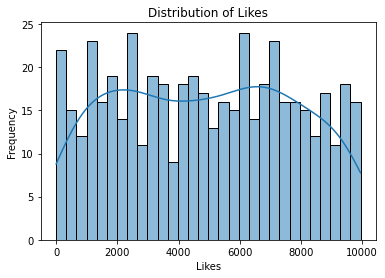

In [16]:
# Histogram to visualize distribution of Likes
sns.histplot(data = df_clean['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

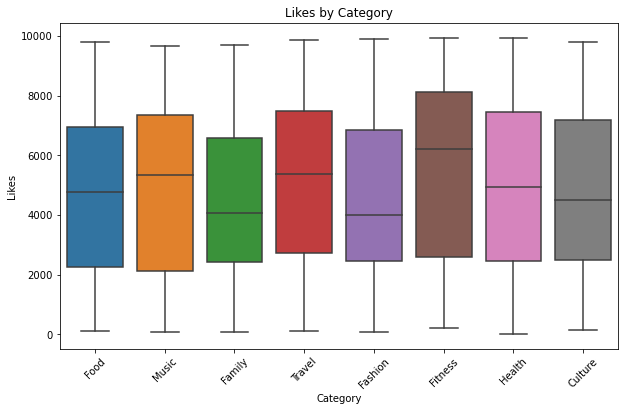

In [17]:
# Boxplot to see spread of Likes per Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=df_clean)
plt.title('Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()


In [18]:
mean_likes = df_clean['Likes'].mean()
print("🔹 Average Likes (overall):", int(mean_likes))


🔹 Average Likes (overall): 4870


In [19]:
category_mean = df_clean.groupby('Category')['Likes'].mean()
print("\n🔹 Average Likes by Category:")
print(category_mean.sort_values(ascending=False))




🔹 Average Likes by Category:
Category
Fitness    5593.762712
Travel     5185.553571
Health     5006.680556
Culture    4836.885246
Food       4820.727273
Music      4769.692308
Family     4502.078125
Fashion    4420.592593
Name: Likes, dtype: float64


## Conclusion – Social Media Data Analysis
In this project, I simulated a social media dataset to analyze user engagement through likes across various content categories. The process involved several stages of data generation, cleaning, visualization, and statistical evaluation, each of which helped enhance both the data quality and insights gained.

### Process Overview
#### Data Generation:

- Created a synthetic dataset with 500 entries.

- Used pandas for dates, random for category selection, and numpy for like counts.

#### Data Cleaning:

- Removed missing (NaN) and duplicate values using `dropna()` and `drop_duplicates()`.

- Converted Date to datetime using `pd.to_datetime` and coerced invalid formats.

- Ensured Likes values were integers by using `pd.to_numeric()` and `astype(int)`.

#### Visualization:

- Used Seaborn and Matplotlib to plot:

   - A histogram showing the distribution of likes (fairly uniform).

   - A boxplot comparing likes across different content categories.

#### Statistical Analysis:

- Calculated overall average likes (≈4870).

- Grouped data by Category to find category-wise mean likes.

- Identified Fitness, Travel, and Health as top-performing categories in terms of average likes.

### Key Insights
- Fitness content received the highest average engagement, followed by Travel and Health.

- The boxplot revealed a wide range of likes in each category, suggesting variability in audience response.

- The histogram showed a fairly even spread, indicating no extreme skew in engagement distribution.

### Challenges & Solutions
- Encountered an AttributeError with sns.histplot() due to version mismatch. Solved it by:

  - Upgrading Seaborn.

- Ensured robustness by coercing invalid formats and cleaning data systematically.


This project showcases my ability to simulate data-driven scenarios, clean and preprocess datasets, visualize effectively, and derive actionable insights—skills that are critical for data roles in tech and business environments.